In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("CleanedAirQuality.csv")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [24]:
# Creating list of column names corresponding to their categories for later use.

sensor_cols = ['PT08.S1(CO)', 'PT08.S3(NOx)',  'PT08.S4(NO2)', 'PT08.S5(O3)', 'PT08.S2(NMHC)']
pollutant_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'NMHC(GT)']
weather_cols = ['T', 'RH', 'AH']

In [26]:
# Creating a dictionary of sensors as keys and values as their pollutant
# This can be used to create scatter plots

sen_poll = {sensor_cols[x]:pollutant_cols[x] for x in range(len(sensor_cols))}
sen_poll

{'PT08.S1(CO)': 'CO(GT)',
 'PT08.S3(NOx)': 'NOx(GT)',
 'PT08.S4(NO2)': 'NO2(GT)',
 'PT08.S5(O3)': 'C6H6(GT)',
 'PT08.S2(NMHC)': 'NMHC(GT)'}

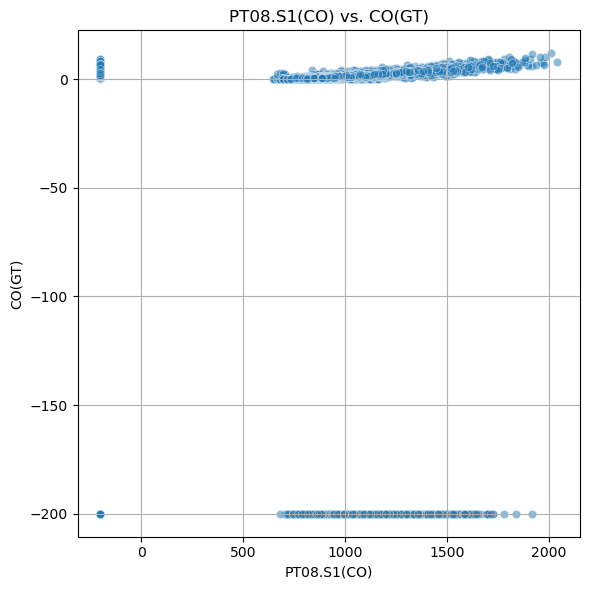

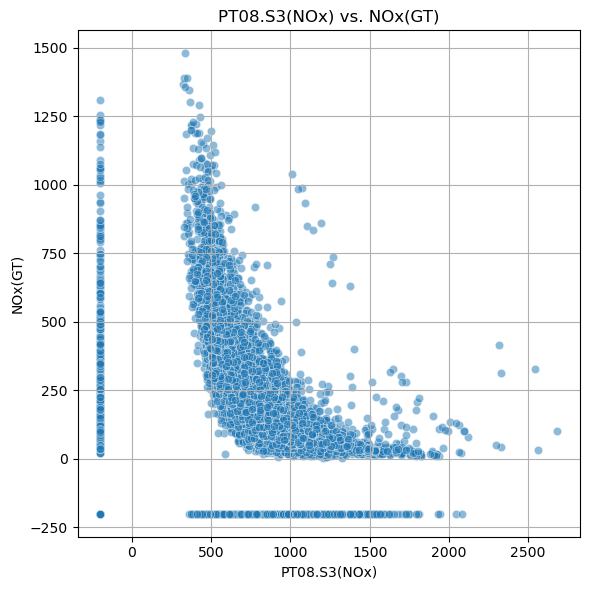

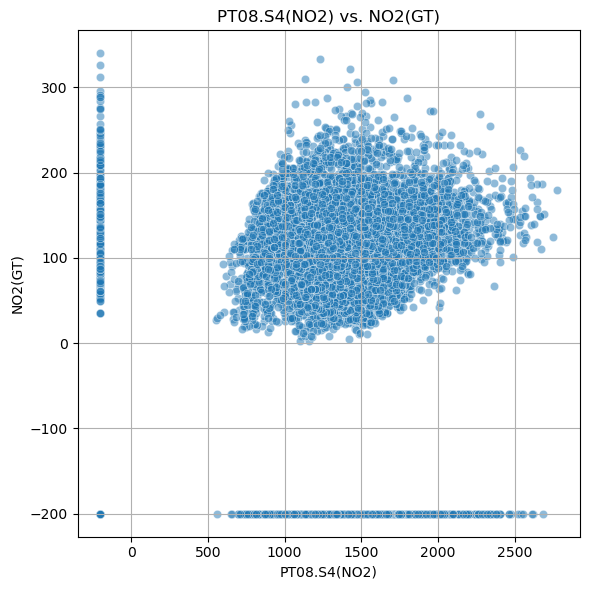

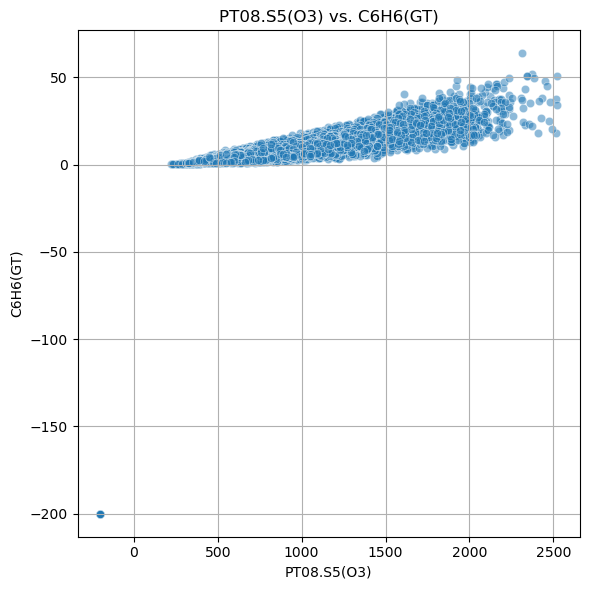

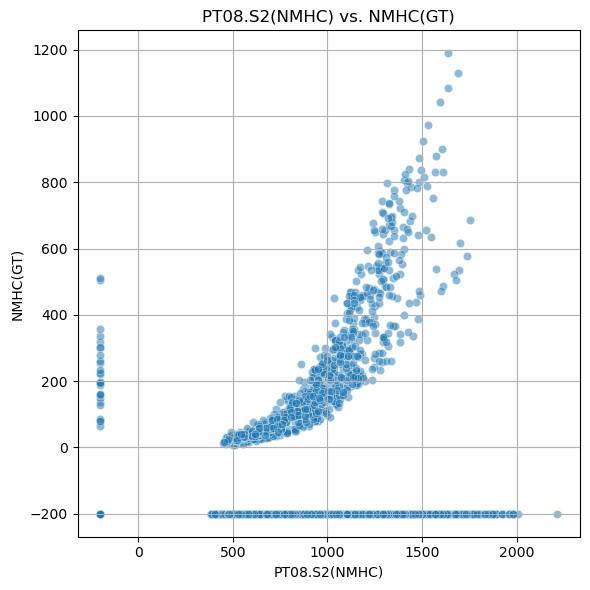

In [28]:
for sensor, pollutant in sen_poll.items():
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=df[sensor], y=df[pollutant], alpha=0.5)
    plt.title(f'{sensor} vs. {pollutant}')

    plt.tight_layout()
    plt.grid()
    plt.show()

In [35]:
# removing Date and Time Column

correlation_data = df.drop(columns=['Time','Date'])
correlation_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [36]:
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()


In [37]:
sensor_pollutant_corr = correlation_matrix.loc[sensor_cols, pollutant_cols]
# sns.heatmap(sensor_pollutant_corr, cmap = 'coolwarm')
sensor_pollutant_corr

,CO(GT),NOx(GT),NO2(GT),C6H6(GT),NMHC(GT)
PT08.S1(CO),0.041411,0.277993,0.154030,0.852687,0.170007
PT08.S3(NOx),-0.089981,-0.436084,-0.256232,0.512193,0.048821
PT08.S4(NO2),-0.073724,0.035546,-0.022174,0.774673,0.162680
PT08.S5(O3),0.080310,0.461889,0.253439,0.641334,0.101185
PT08.S2(NMHC),0.029926,0.331272,0.176488,0.767433,0.110104
